## 1. Importar Librerias

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar estilo femenino
plt.style.use('seaborn-v0_8-pastel')
colores = ['#FF69B4', '#DDA0DD', '#FFB6C1', '#FFC0CB', '#E6E6FA']
sns.set_palette(colores)


## 2. Cargar Datos Limpios

In [19]:
df = pd.read_csv('../data/medicamentos_limpios.csv')
print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Datos cargados: 6277 filas, 10 columnas


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor,categoria_precio
0,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,3752.866667,Medio,2,Economico
1,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,1777.266522,Medio,2,Economico
2,Fluoxetina,Capsula,Fluoxetina 20 mg,mg,Fluoxetina,Genfar,329.295281,Medio,2,Economico
3,Alopurinol,Tableta,Alopurinol 300 mg,mg,Alopurinol,Memphis,365.399678,Bajo,1,Economico
4,Haloperidol,Tableta,Haloperidol 10 mg,mg,Haloperidol,Memphis,544.461667,Alto,3,Economico


# ANALISIS ESTADISTICO

## 3. Medidas de Tendencia Central

In [20]:
media = df['precio_por_tableta'].mean()
mediana = df['precio_por_tableta'].median()
moda = df['precio_por_tableta'].mode()[0] if not df['precio_por_tableta'].mode().empty else None

print("MEDIDAS DE TENDENCIA CENTRAL")
print(f"Media: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
if moda:
    print(f"Moda: ${moda:.2f}")

MEDIDAS DE TENDENCIA CENTRAL
Media: $11211.51
Mediana: $1260.62
Moda: $1500.00


## 4. Medidas de Dispersion

In [21]:
varianza = df['precio_por_tableta'].var()
desviacion = df['precio_por_tableta'].std()
rango = df['precio_por_tableta'].max() - df['precio_por_tableta'].min()
q1 = df['precio_por_tableta'].quantile(0.25)
q3 = df['precio_por_tableta'].quantile(0.75)
iqr = q3 - q1
cv = (desviacion / media) * 100

print("MEDIDAS DE DISPERSION")
print(f"Varianza: ${varianza:.2f}")
print(f"Desviacion Estandar: ${desviacion:.2f}")
print(f"Rango: ${rango:.2f}")
print(f"IQR: ${iqr:.2f}")
print(f"Coeficiente de Variacion: {cv:.2f}%")
print(f"\nCuartiles:")
print(f"Q1: ${q1:.2f}")
print(f"Q2 (Mediana): ${mediana:.2f}")
print(f"Q3: ${q3:.2f}")

MEDIDAS DE DISPERSION
Varianza: $4515137586.24
Desviacion Estandar: $67194.77
Rango: $1875982.21
IQR: $2937.86
Coeficiente de Variacion: 599.34%

Cuartiles:
Q1: $462.00
Q2 (Mediana): $1260.62
Q3: $3399.86


## 5. Tabla de Frecuencias

In [22]:
if 'categoria_precio' in df.columns:
    frecuencias = df['categoria_precio'].value_counts()
    porcentajes = (frecuencias / len(df)) * 100
    
    tabla = pd.DataFrame({
        'Frecuencia': frecuencias,
        'Porcentaje': porcentajes.round(2)
    })
    
    print("TABLA DE FRECUENCIAS - CATEGORIAS DE PRECIO")
    print(tabla)

TABLA DE FRECUENCIAS - CATEGORIAS DE PRECIO
                  Frecuencia  Porcentaje
categoria_precio                        
Economico               5716       91.06
Moderado                 337        5.37
Costoso                  152        2.42
Muy Costoso               72        1.15


## 6. Analisis por Principio Activo

In [23]:
print("TOP 10 PRINCIPIOS ACTIVOS")
print(df['principio_activo'].value_counts().head(10))

TOP 10 PRINCIPIOS ACTIVOS
principio_activo
Rosuvastatina          94
Atorvastatina          85
Etoricoxib             77
Levotiroxina Sodica    76
Ibuprofeno             65
Esomeprazol            63
Montelukast            62
Pregabalina            61
Escitalopram           61
Lacosamida             58
Name: count, dtype: int64


In [24]:
top_10 = df['principio_activo'].value_counts().head(10).index
stats = df[df['principio_activo'].isin(top_10)].groupby('principio_activo')['precio_por_tableta'].agg([
    ('Cantidad', 'count'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Promedio', 'mean'),
    ('Desv_Est', 'std')
]).round(2)

print("\nESTADISTICAS POR PRINCIPIO ACTIVO")
print(stats)


ESTADISTICAS POR PRINCIPIO ACTIVO
                     Cantidad     Min       Max  Promedio  Desv_Est
principio_activo                                                   
Atorvastatina              85    4.89   8450.00   1868.43   2049.95
Escitalopram               61  116.38  17368.10   2655.06   3785.13
Esomeprazol                63   70.88  10714.29   2726.43   2541.15
Etoricoxib                 77  636.26   8848.00   2910.67   2104.34
Ibuprofeno                 65    2.39   2749.00    785.51    726.80
Lacosamida                 58  522.41  10154.13   2708.65   2306.98
Levotiroxina Sodica        76    9.00   1864.96    718.34    486.11
Montelukast                62  198.38  78016.82   2625.86   9905.83
Pregabalina                61  116.62   5252.00    932.05    898.51
Rosuvastatina              94  109.35  86512.46   5126.55  10762.68


## 7. Analisis por Fabricante

In [25]:
print("TOP 10 FABRICANTES")
print(df['fabricante'].value_counts().head(10))

TOP 10 FABRICANTES
fabricante
Tecnoquimicas    406
Lafrancol        262
Procaps          247
Genfar           207
Mega Labs        200
Siegfried        171
Pfizer           164
Legrand          159
Novamed          159
Hetero Labs      156
Name: count, dtype: int64


## 8. Matriz de Correlacion

In [26]:
df_num = df.select_dtypes(include=[np.number])
correlacion = df_num.corr()
print("MATRIZ DE CORRELACION")
print(correlacion.round(3))

MATRIZ DE CORRELACION
                    precio_por_tableta  numerofactor
precio_por_tableta               1.000         0.046
numerofactor                     0.046         1.000


# VISUALIZACIONES

## 9. Histograma

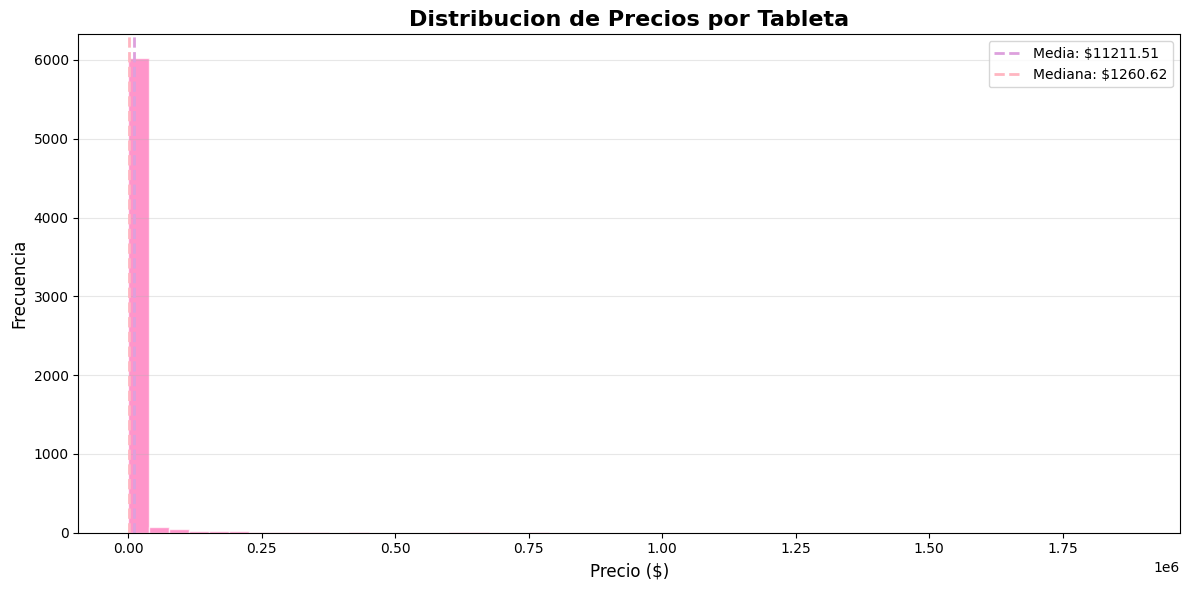

In [27]:
plt.figure(figsize=(12, 6))
plt.hist(df['precio_por_tableta'], bins=50, color='#FF69B4', edgecolor='white', alpha=0.7)
plt.axvline(media, color='#DDA0DD', linestyle='--', linewidth=2, label=f'Media: ${media:.2f}')
plt.axvline(mediana, color='#FFB6C1', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.2f}')
plt.title('Distribucion de Precios por Tableta', fontsize=16, fontweight='bold')
plt.xlabel('Precio ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Boxplot

/tmp/ipykernel_43810/210766553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='fabricante', y='precio_por_tableta', palette=colores)
/tmp/ipykernel_43810/210766553.py:5: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_top, x='fabricante', y='precio_por_tableta', palette=colores)


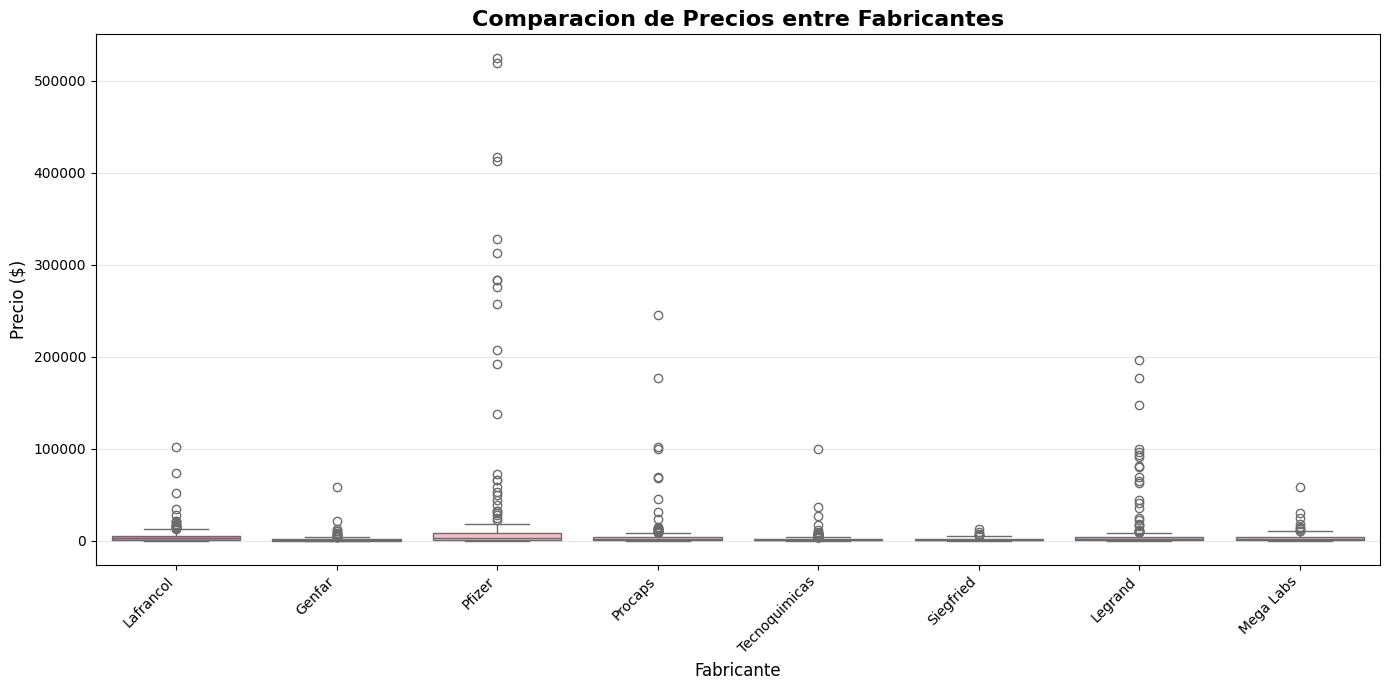

In [28]:
top_8_fab = df['fabricante'].value_counts().head(8).index
df_top = df[df['fabricante'].isin(top_8_fab)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top, x='fabricante', y='precio_por_tableta', palette=colores)
plt.title('Comparacion de Precios entre Fabricantes', fontsize=16, fontweight='bold')
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Grafico de Barras

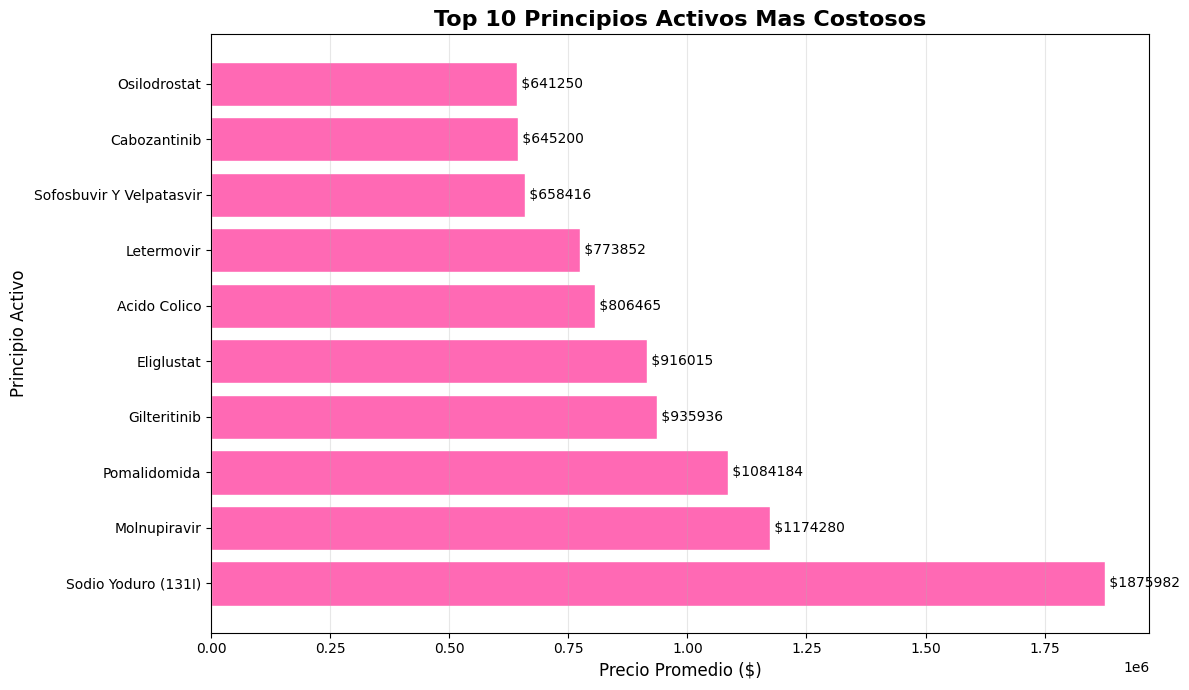

In [29]:
precio_prom = df.groupby('principio_activo')['precio_por_tableta'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
plt.barh(range(len(precio_prom)), precio_prom.values, color='#FF69B4', edgecolor='white')
plt.yticks(range(len(precio_prom)), precio_prom.index)

for i, val in enumerate(precio_prom.values):
    plt.text(val, i, f' ${val:.0f}', va='center')

plt.title('Top 10 Principios Activos Mas Costosos', fontsize=16, fontweight='bold')
plt.xlabel('Precio Promedio ($)', fontsize=12)
plt.ylabel('Principio Activo', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 12. Heatmap

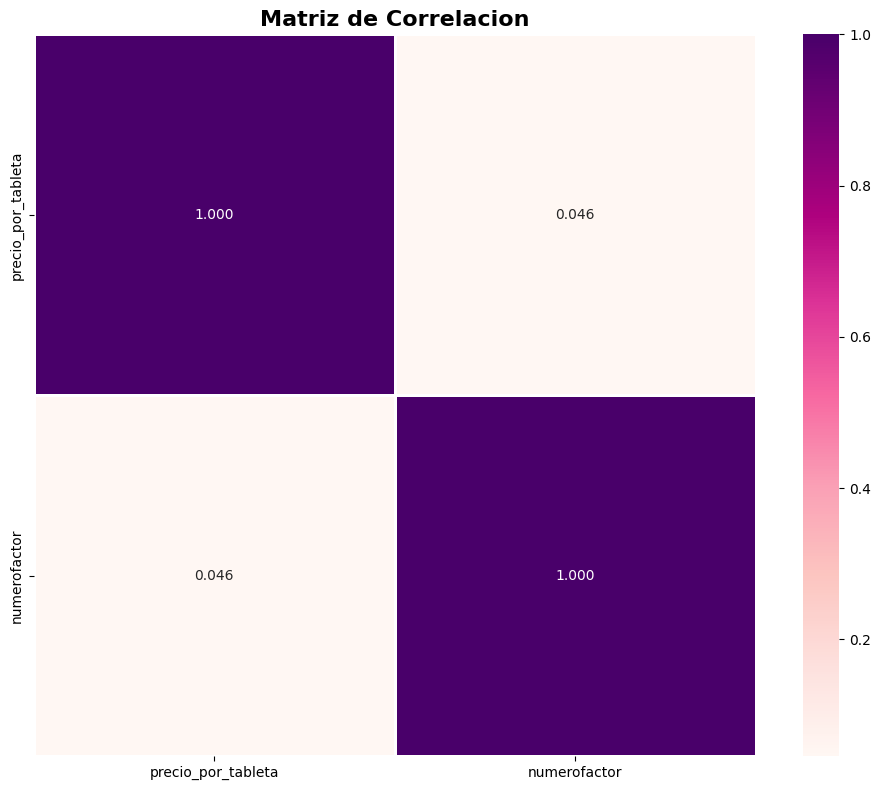

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.3f', cmap='RdPu', square=True, linewidths=1)
plt.title('Matriz de Correlacion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 13. Comparacion Economicos vs Costosos

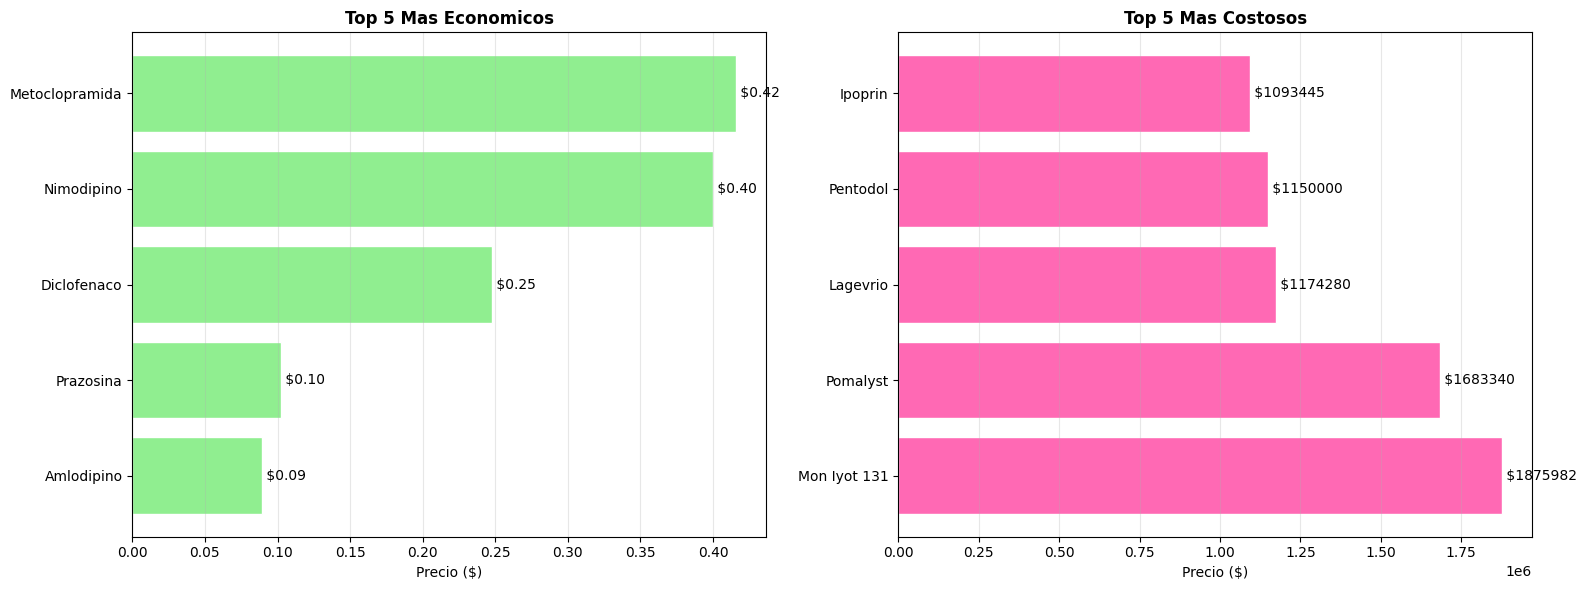

In [31]:
mas_baratos = df.nsmallest(5, 'precio_por_tableta')[['nombre_comercial', 'precio_por_tableta']]
mas_caros = df.nlargest(5, 'precio_por_tableta')[['nombre_comercial', 'precio_por_tableta']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.barh(range(5), mas_baratos['precio_por_tableta'].values, color='#90EE90', edgecolor='white')
ax1.set_yticks(range(5))
ax1.set_yticklabels(mas_baratos['nombre_comercial'].values)
ax1.set_xlabel('Precio ($)')
ax1.set_title('Top 5 Mas Economicos', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, val in enumerate(mas_baratos['precio_por_tableta'].values):
    ax1.text(val, i, f' ${val:.2f}', va='center')

ax2.barh(range(5), mas_caros['precio_por_tableta'].values, color='#FF69B4', edgecolor='white')
ax2.set_yticks(range(5))
ax2.set_yticklabels(mas_caros['nombre_comercial'].values)
ax2.set_xlabel('Precio ($)')
ax2.set_title('Top 5 Mas Costosos', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for i, val in enumerate(mas_caros['precio_por_tableta'].values):
    ax2.text(val, i, f' ${val:.0f}', va='center')

plt.tight_layout()
plt.show()

## 14. Violinplot

/tmp/ipykernel_43810/3615266563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='categoria_precio', y='precio_por_tableta',
/tmp/ipykernel_43810/3615266563.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.violinplot(data=df, x='categoria_precio', y='precio_por_tableta',


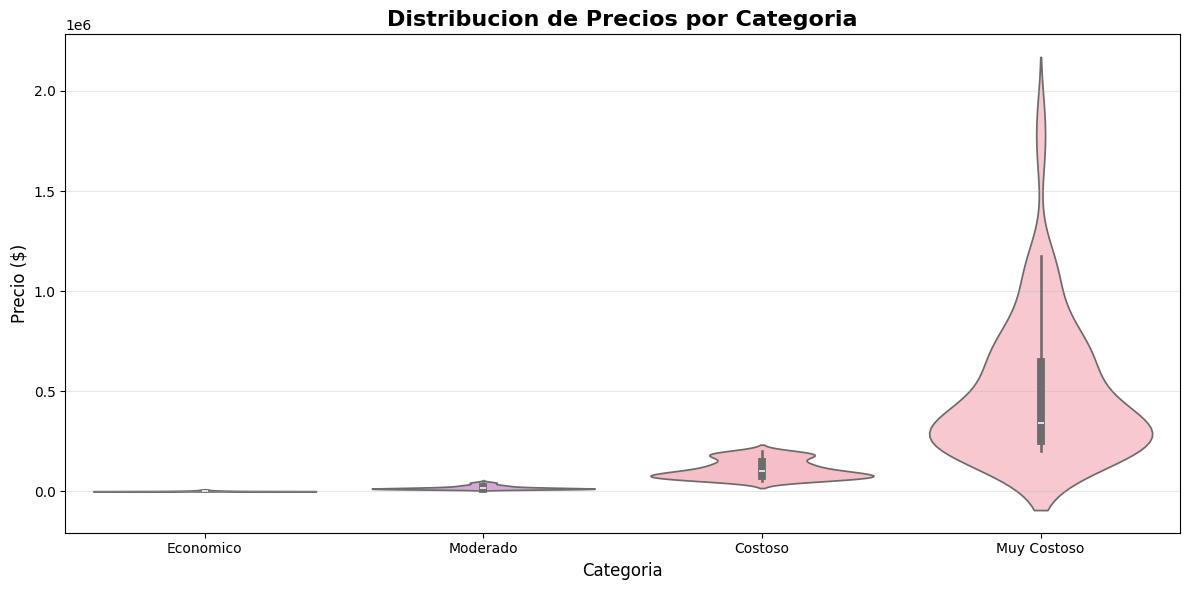

In [32]:
if 'categoria_precio' in df.columns:
    plt.figure(figsize=(12, 6))
    orden = ['Economico', 'Moderado', 'Costoso', 'Muy Costoso']
    sns.violinplot(data=df, x='categoria_precio', y='precio_por_tableta',
                   palette=colores, order=orden)
    plt.title('Distribucion de Precios por Categoria', fontsize=16, fontweight='bold')
    plt.xlabel('Categoria', fontsize=12)
    plt.ylabel('Precio ($)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 15. Grafico de Pastel

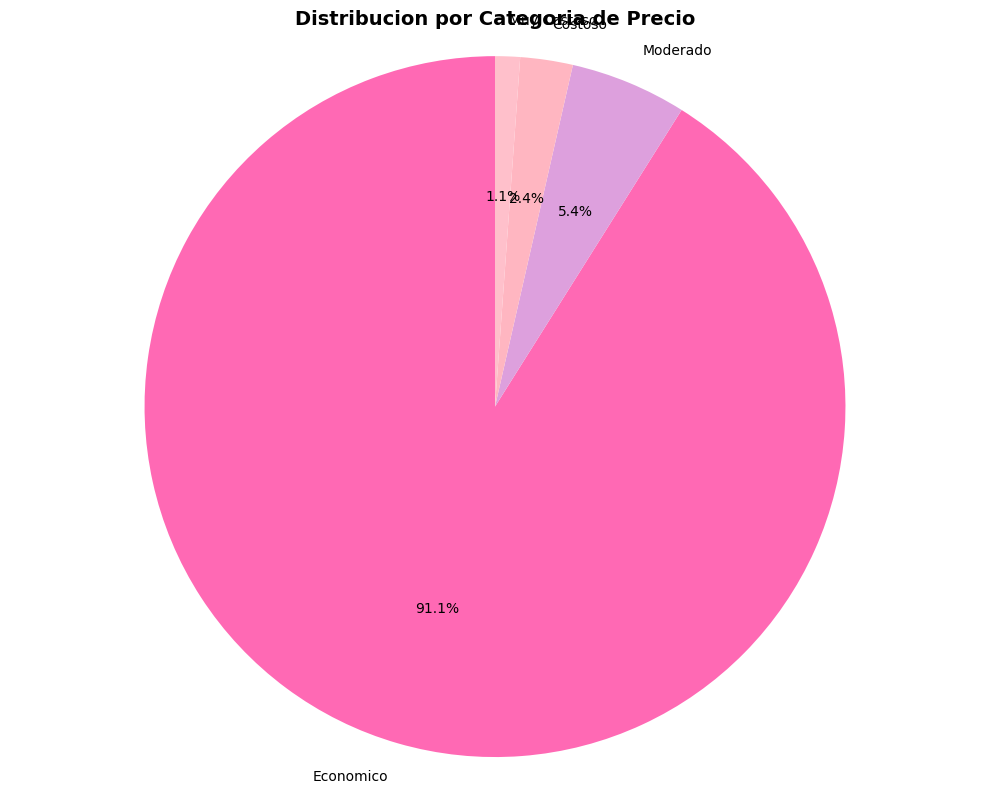

In [33]:
if 'categoria_precio' in df.columns:
    categoria_counts = df['categoria_precio'].value_counts()
    
    plt.figure(figsize=(10, 8))
    plt.pie(categoria_counts.values, labels=categoria_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=colores)
    plt.title('Distribucion por Categoria de Precio', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# CONCLUSIONES

## 16. Resumen de Hallazgos

In [34]:
print("RESUMEN EJECUTIVO")
print(f"\nESTADISTICAS GENERALES:")
print(f"Total medicamentos: {len(df)}")
print(f"Principios activos: {df['principio_activo'].nunique()}")
print(f"Fabricantes: {df['fabricante'].nunique()}")
print(f"\nPRECIOS:")
print(f"Promedio: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Rango: ${df['precio_por_tableta'].min():.2f} - ${df['precio_por_tableta'].max():.2f}")
print(f"Variabilidad (CV): {cv:.1f}%")

RESUMEN EJECUTIVO

ESTADISTICAS GENERALES:
Total medicamentos: 6277
Principios activos: 867
Fabricantes: 272

PRECIOS:
Promedio: $11211.51
Mediana: $1260.62
Rango: $0.09 - $1875982.30
Variabilidad (CV): 599.3%
